Dataset is at: https://www.dropbox.com/s/q3674olgj4z7i4m/face_mask.zip?dl=0

**Abstract:**

With the recent COVID-19 pandemic, it is mandatory for individuals to practice social responsibility and wear face masks in public spaces to curb the spread of the disease. The detection of masked faces is thus extremely important as such algorithm can be integrated in various surveillance methods to complement current enforcement methods. In this project, our group applied Neural Networks, Support Vector Machines, Decision Trees, Random Forests, and Transfer Learning for classification. We found that xyz was the best model, with an accuracy of xyz%. 

**Literature Review**


The outbreak of COVID-19 , the novel coronavirus SARS-CoV-2 infection was, first reported on December 31, 2019, in Wuhan, China. Since then, COVID-19 has been spreading rampantly throughout the world, with the World Health Organization (WHO) declaring COVID-19 a pandemic due to alarming levels of spread and severity on March 11, 2020 (Wan, 2020). 
COVID-19 is the third coronavirus to have threatened global public health in the past 20 years, following Severe Acute Respiratory Syndrome Coronavirus (SARS-CoV) in 2002, and Middle East Respiratory Syndrome Coronavirus (MERS-CoV) in 2012 (Wang et al., 2020). The usage of masks to curb the spread of these coronaviruses have been well established (Eikenberry et al., 2020) (MacIntyre et al., 2009), with more than one hundred countries issuing nationwide mask mandates (Felter et al., 2020) as a source control to reduce community transmission. 
While facial detection has been well studied (Almadhor et al., 2018), face mask detection is a difficult problem as facial features are covered up by masks. Furthermore, masks come in different shapes, sizes, and colours. This results in current face recognition algorithms to struggle with masked faces, with even the best algorithms having failure rates of between 5% to 50% (NIST, 2020) (Vincent, 2020) (Metz 2020). 
In this paper, we explore different machine learning and deep learning models to identify individuals wearing face masks or face shields. This can be implemented in surveillance cameras, allowing real-time monitoring of people wearing masks, replacing the cumbersome process of manual monitoring, as well as complementing current facial recognition technology. 


**Data Description:**

The original dataset contains 3 class: "face" "masked" "shield". In "face" folder, we have 90400 pictures, in "masked" folder, we have 2136 pictures and in "shield" folder, we have 100 pictures. Clearly, our "shield" dataset is small. Then we use data augmentation method (rotation, increase noise and flip) to generate 900 new pictures. Then in total, we have 1000 pictures of people wearing only shield. 

Data Augmentation:

In [ ]:
import random
import os
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util
from skimage import io

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

In [ ]:
def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]

In [ ]:
# dictionary of the transformations we defined earlier
available_transformations = {
    'rotate': random_rotation,
    'noise': random_noise,
    'horizontal_flip': horizontal_flip
}

In [ ]:
# our folder path containing some images
folder_path = '/Users/shijiazeng/Desktop/shield'
# the number of file to generate
num_files_desired = 899
#899 here actually generated 900 new files because we start from 0

# loop on all files of the folder and build a list of files paths
images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
num_generated_files = 0
while num_generated_files <= num_files_desired:
    # random image from the folder
    image_path = random.choice(images)
    # read image as an two dimensional array of pixels
    image_to_transform = sk.io.imread(image_path,plugin='matplotlib')
    # random num of transformation to apply
    num_transformations_to_apply = random.randint(1, len(available_transformations))

    num_transformations = 0
    transformed_image = None
    while num_transformations <= num_transformations_to_apply:
        # random transformation to apply for a single image
        key = random.choice(list(available_transformations))
        transformed_image = available_transformations[key](image_to_transform)
        num_transformations += 1
        new_file_path = '%s/augmented_image_%s.jpg' % (folder_path, num_generated_files)
        io.imsave(new_file_path, transformed_image)
    num_generated_files += 1

Now we are working on the reduced dataset, where we randomly selected only 1000 pictures from "face" and "masked" folder respectively. Then We randomly split pictures into 3 datasets, with training set having 60% pictures, validation dataset having 20% pictures and test dataset having 20% pictures.  The new reduced dataset contain 3 folders, namely "train" "validate" "test". Inside the "train" folder, we got 3 subfolders "face" "masked" "shield" which contains "face" "masked" "shield" pictures respectively. 

The new reduced dataset:

Train set: 60%
1. face: randomly choose 600 pics from 1000 pics
2. masked: randomly choose 600 pics from 1000 pics
3. shield: randomly choose 600 pics from 1000 pics

Validate set: 20%
1. face: randomly choose 200 pics from remaining 400 pics
2. masked: randomly choose 200 pics from remaining 400 pics
3. shield: randomly choose 200 pics from remaining 400 pics

Test set: 20%
1. face: from remaining 200 pics
2. masked: from remaining 200 pics
3. shield: from remaining 200 pics

Data Preprocessing:

Randomly select files from a folder and copy them to a new folder:


In [ ]:
import glob, shutil, random, os
dirpath = '/Users/shijiazeng/Desktop/old'
dst_dir = '/Users/shijiazeng/Desktop/new'

filenames = random.sample(os.listdir(dirpath), 1000)
for fname in filenames:
    srcpath = os.path.join(dirpath, fname)
    shutil.move(srcpath, dst_dir)

Finally, the face_mask is a dataset of 3000 labelled images belonging to 3 categories, namely "face", "masked" and "shield". 1000 images were labelled as "face", 1000 images were labelled as "masked" and 1000 images were labelled as "shield". There are 1800 images in the train set (600 "face", 600 "masked" and 600 "shield"),  600 images in the validation set (200 "face", 200 "masked" and 200 "shield") and 600 images in the test set (200 "face", 200 "masked" and 200 "shield").

**Data Visualization:**

In [ ]:
def load_data(dir_path, img_size=(100,100)):
    """
    Load resized images as np.arrays to workspace
    """
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels

In [ ]:
train_path = '/content/face_mask/train/'
test_path = '/content/face_mask/test/'
valid_path = '/content/face_mask/validate/'
IMG_SIZE = (224,224)

# use predefined function to load the image data into workspace
X_train, y_train, labels = load_data(train_path, IMG_SIZE)
X_test, y_test, _ = load_data(test_path, IMG_SIZE)
X_val, y_val, _ = load_data(valid_path, IMG_SIZE)

  0%|          | 0/4 [00:00<?, ?it/s]

1800 images loaded from /content/face_mask/train/ directory.


  0%|          | 0/4 [00:00<?, ?it/s]

600 images loaded from /content/face_mask/test/ directory.


100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

600 images loaded from /content/face_mask/validate/ directory.


In [ ]:
y = dict()
y[0] = []
y[1] = []
for set_name in (y_train, y_val, y_test):
    y[0].append(np.sum(set_name == 0))
    y[1].append(np.sum(set_name == 1))

trace0 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[0],
    name='No',
    marker=dict(color='#33cc33'),
    opacity=0.7
)
trace1 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[1],
    name='Yes',
    marker=dict(color='#ff3300'),
    opacity=0.7
)
data = [trace0, trace1]
layout = go.Layout(
    title='Count of classes in each set',
    xaxis={'title': 'Set'},
    yaxis={'title': 'Count'}
)
fig = go.Figure(data, layout)
iplot(fig)

In [ ]:
def plot_samples(X, y, labels_dict, n=50):
    """
    Creates a gridplot for desired number of images (n) from the specified set
    """
    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(15,6))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle('class: {}'.format(labels_dict[index]))
        plt.show()

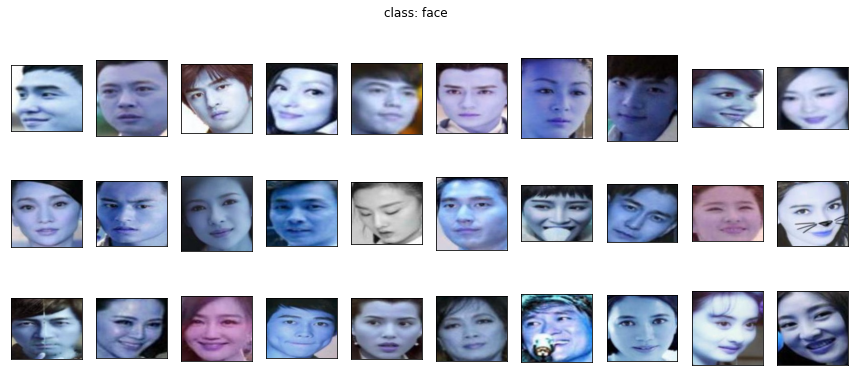

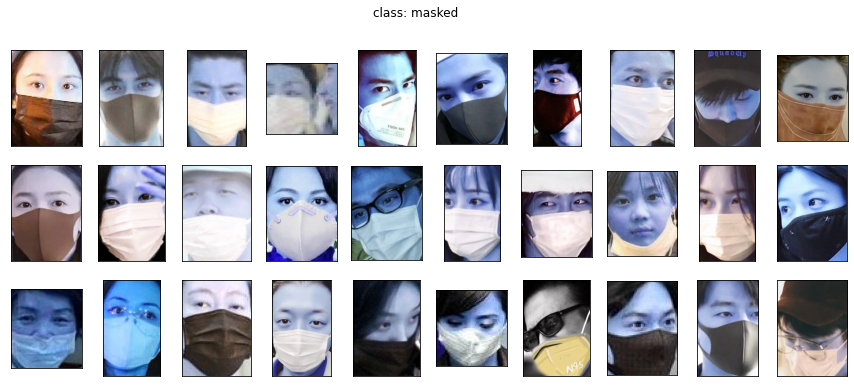

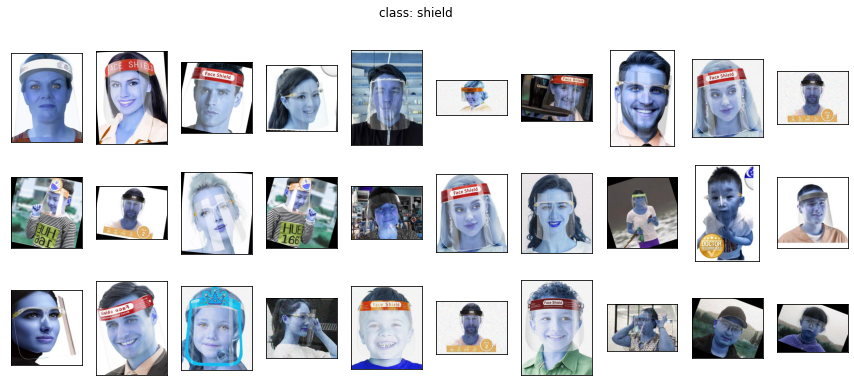

In [ ]:
plot_samples(X_train, y_train, labels, 30)

DNN


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn import model_selection
from sklearn.metrics import accuracy_score, confusion_matrix
import mlxtend                                                          
from mlxtend.plotting import plot_confusion_matrix
import datetime, os
# Utility
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Note you need to add the path of graphviz/bin to your system's and user's environment variables
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Alex/graphviz-2.44.1-win32/Graphviz/bin'
import keras
import pydot
import pydotplus
from pydotplus import graphviz
from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import model_to_dot

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


def plot_history(history):
    """ Function to plot the training/validation history
    of a neural network.
    """
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(acc) + 1)
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].plot(epochs, acc, "bo", label="Training acc")
    ax[0].plot(epochs, val_acc, "b", label="Validation acc")
    ax[0].set_title("Training and validation accuracy")
    ax[0].legend()
    ax[1].plot(epochs, loss, "bo", label="Training loss")
    ax[1].plot(epochs, val_loss, "b", label="Validation loss")
    ax[1].set_title("Training and validation loss")
    ax[1].legend()
    fig.tight_layout()

In [ ]:
# define the training, validation and testing directories
train_dir = '/content/face_mask/train'
val_dir = '/content/face_mask/validate'
test_dir = '/content/face_mask/test'

# define the number of training, validation and testing samples
num_train_images = 1800
num_val_images = 600
num_test_images = 600

In [ ]:
# use ImageDataGenerator to create trainining, validation and
# testing samples from the jpg files

# rescale the RGB pixel values into the [0, 1] interval
train_datagen = ImageDataGenerator(rescale=1 / 255)
test_datagen = ImageDataGenerator(rescale=1 / 255)

# resized image dimensions
HEIGHT = 50
WIDTH = 50

# the batch size of the generator
BATCH_SIZE = 32

# initiate the generators that will also resize the
# images to HEIGHT x WIDTH pixels for faster training
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(HEIGHT, WIDTH), batch_size=BATCH_SIZE, class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    val_dir, target_size=(HEIGHT, WIDTH), batch_size=BATCH_SIZE, class_mode = 'categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(HEIGHT, WIDTH), batch_size=BATCH_SIZE, class_mode = 'categorical'
)

Found 1800 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [ ]:
# initiate the neural network using the Sequential class
# and add a flattening layer
model = models.Sequential()
model.add(layers.Flatten(input_shape=(HEIGHT, WIDTH, 3)))

# build the network
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

# compile the network
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

import numpy as np
seed = 7
np.random.seed(seed)

In [ ]:
# train the model

EPOCHS = 25
history = model.fit_generator(
    train_generator,
    steps_per_epoch=num_train_images // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=num_val_images // BATCH_SIZE,
    verbose=1,
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
56/56 [==============================] - 6s 104ms/step - loss: 1.1513 - categorical_accuracy: 0.6160 - val_loss: 0.7479 - val_categorical_accuracy: 0.6719
Epoch 2/25
56/56 [==============================] - 6s 100ms/step - loss: 0.4868 - categorical_accuracy: 0.8049 - val_loss: 0.3808 - val_categorical_accuracy: 0.8576
Epoch 3/25
56/56 [==============================] - 6s 102ms/step - loss: 0.4249 - categorical_accuracy: 0.8337 - val_loss: 0.4086 - val_categorical_accuracy: 0.8351
Epoch 4/25
56/56 [==============================] - 6s 101ms/step - loss: 0.3625 - categorical_accuracy: 0.8727 - val_loss: 0.3409 - val_categorical_accuracy: 0.8663
Epoch 5/25
56/56 [==============================] - 6s 101ms/step - loss: 0.3026 - categorical_accuracy: 0.8976 - val_loss: 0.2987 - val_categorical_accuracy: 0.8837
Epoch 6/25
56/56 [==============================] - 6s 100ms/step - loss: 0.2460 - categorical

In [ ]:
# evaluate the model
model.evaluate(test_generator, steps=num_test_images // BATCH_SIZE, verbose=1)

18/18 [==============================] - 1s 77ms/step - loss: 0.1895 - categorical_accuracy: 0.9392


[0.1894797682762146, 0.9392361044883728]

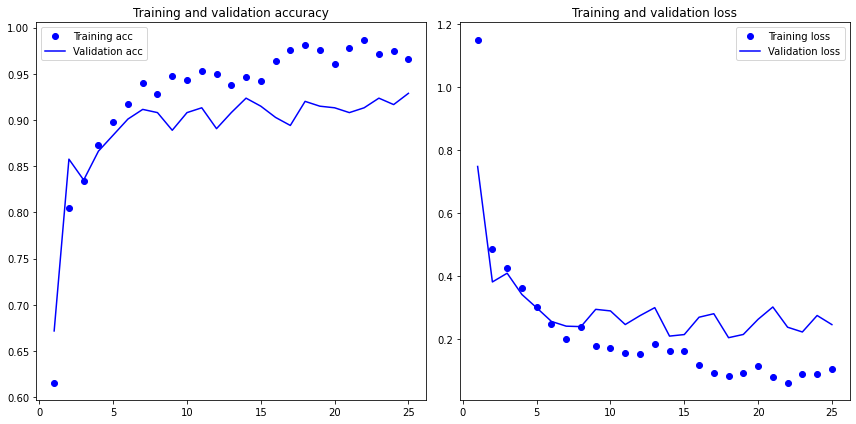

In [ ]:
# plot the training history with the plot_history() function
plot_history(history)

In [ ]:
def build_model(dense_nodes):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(50, 50, 3)))
    # build the network
    model.add(keras.layers.Dense(dense_nodes, activation = 'relu'))
    model.add(keras.layers.Dense(3, activation = 'softmax'))
    # compile the network
    model.compile(loss='categorical_crossentropy', 
                  optimizer=Adam(lr=0.001),
                  metrics=['accuracy'])
    return model

In [ ]:
X, Y = train_generator.next()
model = KerasClassifier(build_fn=build_model, epochs=25, batch_size=32, verbose = 1) 
# hyperparameter
dense_nodes = [32, 64, 128, 256, 512]
param_grid = dict(dense_nodes = dense_nodes)
##############################################################
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y) 
##############################################################
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# print the architecture of best DNN produced by grid search
model = models.Sequential()
model.add(layers.Flatten(input_shape=(50, 50, 3)))
# build the network
model.add(keras.layers.Dense(256, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))
# compile the network
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

Grid Search:


In [ ]:
def create_model(filters, kernel_size, pool_size, strides, dropout_rate, dense_nodes):
    model = Sequential([
    Conv2D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(50,50,3)),
    MaxPooling2D(pool_size=pool_size, strides=strides) ,# down sampling the output
    Dropout(dropout_rate),
    Conv2D(filters=filters, kernel_size=kernel_size, activation='relu'),
    Dropout(dropout_rate),
    Flatten(), # flatten out the layers
    Dense(dense_nodes, activation='relu'),
    Dense(3, activation = 'softmax')])
    
    model.compile(loss='categorical_crossentropy', 
                  optimizer=Adam(lr=0.001),
                  metrics=['accuracy'])
    return model

In [ ]:
X, Y = train_generator.next()
model = KerasClassifier(build_fn=create_model, epochs=25, batch_size=32, verbose = 1) 
filters = [16,32]
kernel_size = [2,4]
pool_size = [2,4]
strides = [2,3]
dropout_rate = [0.2, 0.4]
dense_nodes = [16, 32]
param_grid = dict(filters = filters,
                 kernel_size = kernel_size,
                 pool_size = pool_size,
                 strides = strides,
                 dropout_rate = dropout_rate,
                 dense_nodes = dense_nodes)
##############################################################
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y) 
##############################################################
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/25
1/1 [==============================] - 0s 3ms/step - loss: 1.0816 - accuracy: 0.2500
Epoch 2/25
1/1 [==============================] - 0s 2ms/step - loss: 1.0815 - accuracy: 0.3125
Epoch 3/25
1/1 [==============================] - 0s 2ms/step - loss: 1.0670 - accuracy: 0.3125
Epoch 4/25
1/1 [==============================] - 0s 2ms/step - loss: 1.0977 - accuracy: 0.3750
Epoch 5/25
1/1 [==============================] - 0s 3ms/step - loss: 1.1208 - accuracy: 0.3750
Epoch 6/25
1/1 [==============================] - 0s 1ms/step - loss: 1.0038 - accuracy: 0.4375
Epoch 7/25
1/1 [==============================] - 0s 1ms/step - loss: 1.0299 - accuracy: 0.3750
Epoch 8/25
1/1 [==============================] - 0s 2ms/step - loss: 0.9398 - accuracy: 0.5938
Epoch 9/25
1/1 [==============================] - 0s 2ms/step - loss: 0.8951 - accuracy: 0.6875
Epoch 10/25
1/1 [==============================] - 0s 3ms/step - loss: 0.8495 - accuracy: 0.7188
Epoch 11/25
1/1 [======================

In [ ]:
# print the architecture of best CNN produced by grid search
model = Sequential([
Conv2D(filters=16, kernel_size=4, activation='relu', input_shape=(50,50,3)),
MaxPooling2D(pool_size=4, strides=2) ,# down sampling the output
Dropout(0.4),
Conv2D(filters=16, kernel_size=4, activation='relu'),
Dropout(0.4),
Flatten(), # flatten out the layers
Dense(32, activation='relu'),
Dense(3, activation = 'softmax')])
model.compile(loss='categorical_crossentropy', 
                  optimizer=Adam(lr=0.001),
                  metrics=['accuracy'])

tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 47, 47, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 32)        16416     
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                7

In [ ]:
EPOCHS =25
history = model.fit_generator(
                      train_generator,
                      steps_per_epoch=num_train_images // BATCH_SIZE,
                      epochs=EPOCHS,
                      validation_data=validation_generator,
                      validation_steps=num_val_images // BATCH_SIZE,
                      verbose=1
                  )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
56/56 [==============================] - 7s 123ms/step - loss: 0.6968 - accuracy: 0.6940 - val_loss: 0.2712 - val_accuracy: 0.9045
Epoch 2/25
56/56 [==============================] - 7s 119ms/step - loss: 0.2528 - accuracy: 0.9186 - val_loss: 0.1779 - val_accuracy: 0.9358
Epoch 3/25
56/56 [==============================] - 7s 118ms/step - loss: 0.1632 - accuracy: 0.9440 - val_loss: 0.1581 - val_accuracy: 0.9444
Epoch 4/25
56/56 [==============================] - 7s 117ms/step - loss: 0.1427 - accuracy: 0.9508 - val_loss: 0.1352 - val_accuracy: 0.9566
Epoch 5/25
56/56 [==============================] - 7s 117ms/step - loss: 0.1153 - accuracy: 0.9576 - val_loss: 0.0980 - val_accuracy: 0.9722
Epoch 6/25
56/56 [==============================] - 7s 118ms/step - loss: 0.0921 - accuracy: 0.9661 - val_loss: 0.2127 - val_accuracy: 0.9375
Epoch 7/25
56/56 [==============================] - 7s 117ms/step - loss

In [ ]:
model.evaluate(test_generator, steps=num_test_images // BATCH_SIZE, verbose=1)

18/18 [==============================] - 2s 85ms/step - loss: 0.0535 - accuracy: 0.9826


[0.05354294925928116, 0.9826388955116272]

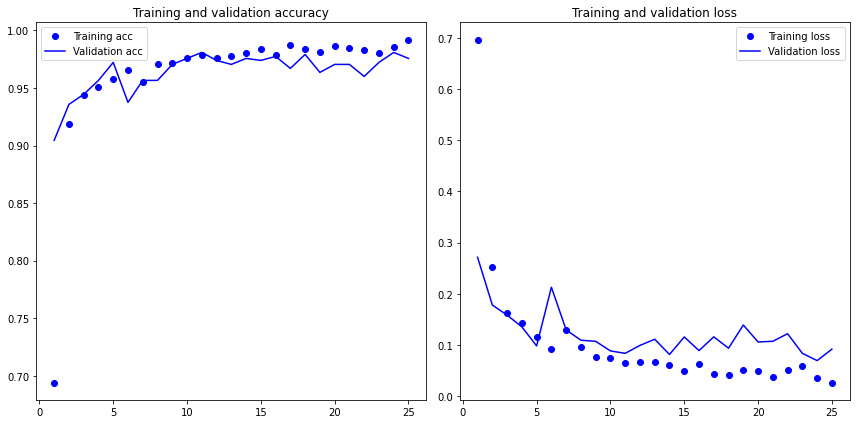

In [ ]:
plot_history(history)

**Transfer Learning**

Traditionally, deep CNN models are specialised on specific tasks, and retraining is required should the feature space changes. However, this is costly as in the era of big data, retraining a CNN may take days, or even weeks. Transfer Learning circumvents this as it allows the use of pre-trained models to solve our unique classification tasks. Specifically, we add a new classifier, ‘face’, ‘masked’, ‘shield’ on the final layer of the CNN, which will be trained from scratch. This will be on top of the pretrained model so that we can repurpose the feature maps learned previously for the dataset. 
This is particularly useful as the learning process of transfer learning is known to be faster, more accurate, and requires less data. This is helpful as we ideally require huge amount of data for training. It is difficult to obtain huge datasets of individuals wearing masks as the wearing of masks is  uncommon prior to the COVID-19 pandemic. 
In our project, we explore the use of VGG16, a CNN model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. We found that… insert results here. 


In [ ]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [ ]:
!unzip '/content/gdrive/My Drive/face_mask/face_mask.zip'

In [ ]:
!rm -rf __MACOSX

In [ ]:
random_seed = 123
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import itertools
import shutil
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.constraints import maxnorm

In [ ]:
def create_model():
    vgg16_model = tf.keras.applications.vgg16.VGG16()
    base_model = tf.keras.applications.vgg16.VGG16(
        weights= '/content/gdrive/My Drive/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
        include_top=False, 
        input_shape=(224,224)+(3,))
    
    # create model
    model = Sequential()
    model.add(base_model)
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.4)) 
    model.add(layers.Dense(3,
                           kernel_initializer='uniform', 
                           activation='softmax',
                           kernel_constraint=maxnorm(50)))
    # Compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer= 'adam',
                  metrics=['accuracy'])
    return model

In [ ]:
def plot_history(history):
    plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validate'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validate'], loc='upper left')

    plt.show()

In [ ]:
train_path = '/content/face_mask/train'
validate_path = '/content/face_mask/validate'
test_path = '/content/face_mask/test'
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['face', 'masked', 'shield'], batch_size=32, seed=random_seed)
validate_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=validate_path, target_size=(224,224), classes=['face', 'masked', 'shield'], batch_size=32, shuffle=False, seed=random_seed)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['face', 'masked', 'shield'], batch_size=32, shuffle=False, seed=random_seed)

Found 1800 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [ ]:
vgg16_model = tf.keras.applications.vgg16.VGG16()
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Sample Code for Grid Search:


In [ ]:
random_seed = 123
train_path = '/content/face_mask/train'
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['face', 'masked', 'shield'], seed=random_seed)
X, Y = train_batches.next()
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose = 1) 
#learn_rate = [0.0001, 0.001]
#dropout_rate = [0.4, 0.8]
#init = ['uniform', 'zero']
#optimizer = ['SGD', 'Adam']
#epochs = [10, 20] # add 50, 100, 150 etc
#batch_size = [16, 32] # add 5, 10, 20, 40, 60, 80, 100 etc
param_grid = dict(#epochs=epochs, 
                  #batch_size=batch_size)
                  #init = init,
                  #learn_rate = learn_rate,
                  #dropout_rate = dropout_rate,
                  #weight_constraint=weight_constraint)
                  optimizer = optimizer)
##############################################################
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y) 
##############################################################
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Build Final Model:

In [ ]:
vgg16_weight_path = '/content/gdrive/My Drive/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model = tf.keras.applications.vgg16.VGG16(
    weights=vgg16_weight_path,
    include_top=False, 
    input_shape=(224,224)+(3,)
)

In [ ]:
NUM_CLASSES = 3

model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(NUM_CLASSES,
                       kernel_initializer='uniform',
                       kernel_constraint=maxnorm(50),
                       activation='softmax'))

model.layers[0].trainable = False

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 3)                 75267     
Total params: 14,789,955
Trainable params: 75,267
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
#from keras.callbacks import EarlyStopping
#es = EarlyStopping(
 #   monitor='val_accuracy', 
  #  mode='max',
#)

history = model.fit(x = train_batches, 
          steps_per_epoch = len(train_batches),
          epochs = 20,
          verbose = 2,
          validation_data = validate_batches,
          validation_steps = len(validate_batches)
         )

Epoch 1/20
57/57 - 13s - loss: 21.8266 - accuracy: 0.5367 - val_loss: 3.4160 - val_accuracy: 0.8550
Epoch 2/20
57/57 - 12s - loss: 4.9256 - accuracy: 0.8389 - val_loss: 1.4769 - val_accuracy: 0.9433
Epoch 3/20
57/57 - 12s - loss: 1.8985 - accuracy: 0.9233 - val_loss: 1.0882 - val_accuracy: 0.9650
Epoch 4/20
57/57 - 12s - loss: 1.5674 - accuracy: 0.9367 - val_loss: 0.9233 - val_accuracy: 0.9750
Epoch 5/20
57/57 - 12s - loss: 0.9857 - accuracy: 0.9578 - val_loss: 0.8431 - val_accuracy: 0.9833
Epoch 6/20
57/57 - 12s - loss: 0.5483 - accuracy: 0.9700 - val_loss: 0.8024 - val_accuracy: 0.9817
Epoch 7/20
57/57 - 12s - loss: 0.6604 - accuracy: 0.9650 - val_loss: 0.7483 - val_accuracy: 0.9833
Epoch 8/20
57/57 - 12s - loss: 0.5820 - accuracy: 0.9806 - val_loss: 0.7218 - val_accuracy: 0.9850
Epoch 9/20
57/57 - 12s - loss: 0.3442 - accuracy: 0.9828 - val_loss: 0.7203 - val_accuracy: 0.9850
Epoch 10/20
57/57 - 12s - loss: 0.2556 - accuracy: 0.9850 - val_loss: 0.6957 - val_accuracy: 0.9850
Epoch 11

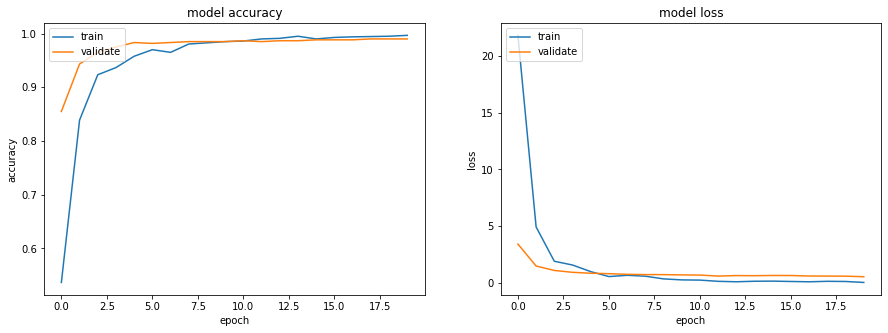

In [ ]:
plot_history(history)

In [ ]:
predictions = model.predict(x = validate_batches, steps = len(validate_batches), verbose = 0)
accuracy = accuracy_score(validate_batches.classes, np.argmax(predictions, axis=-1))
print('Validate Accuracy = %lf' % accuracy)

Validate Accuracy = 0.990000


In [ ]:
cm = confusion_matrix(y_true=validate_batches.classes, y_pred=np.argmax(predictions, axis=-1))
print(cm)

[[199   0   1]
 [  3 195   2]
 [  0   0 200]]


In [ ]:
predictions = model.predict(x = test_batches)
accuracy = accuracy_score(test_batches.classes, np.argmax(predictions, axis=-1))
print('Test Accuracy = %lf' % accuracy)

Test Accuracy = 0.990000


In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
print(cm)

[[197   3   0]
 [  1 198   1]
 [  0   1 199]]


**ResNet**


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
def plot_history(history):
    plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validate'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validate'], loc='upper left')

    plt.show()

In [ ]:
random_seed = 123
train_path = '/content/face_mask/train'
validate_path = '/content/face_mask/validate'
test_path = '/content/face_mask/test'
train_batches = ImageDataGenerator(preprocessing_function=preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['face', 'masked', 'shield'], batch_size=32, seed=random_seed)
validate_batches = ImageDataGenerator(preprocessing_function=preprocess_input) \
    .flow_from_directory(directory=validate_path, target_size=(224,224), classes=['face', 'masked', 'shield'], batch_size=32, shuffle=False, seed=random_seed)
test_batches = ImageDataGenerator(preprocessing_function=preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['face', 'masked', 'shield'], batch_size=32, shuffle=False, seed=random_seed)

Found 1800 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [ ]:
base_model = ResNet50(
    weights='imagenet',
    include_top=False, 
    input_shape=(224,224)+(3,)
)

In [ ]:
NUM_CLASSES = 3

model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

model.layers[0].trainable = False

model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(lr=1e-4),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dropout (Dropout)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 3)                 301059    
Total params: 23,888,771
Trainable params: 301,059
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
EPOCHS = 30
es = EarlyStopping(
    monitor='val_accuracy', 
    mode='max',
    patience=6
)

history = model.fit(
    train_batches,
    steps_per_epoch=len(train_batches),
    epochs=EPOCHS,
    validation_data=validate_batches,
    validation_steps=len(validate_batches),
    callbacks=[es]
)

Epoch 1/30
57/57 [==============================] - 13s 228ms/step - loss: 0.1250 - accuracy: 0.9644 - val_loss: 0.0181 - val_accuracy: 0.9917
Epoch 2/30
57/57 [==============================] - 12s 205ms/step - loss: 0.0019 - accuracy: 0.9989 - val_loss: 0.0073 - val_accuracy: 0.9967
Epoch 3/30
57/57 [==============================] - 12s 204ms/step - loss: 7.5380e-04 - accuracy: 0.9994 - val_loss: 0.0041 - val_accuracy: 0.9983
Epoch 4/30
57/57 [==============================] - 12s 206ms/step - loss: 1.7771e-05 - accuracy: 1.0000 - val_loss: 0.0131 - val_accuracy: 0.9967
Epoch 5/30
57/57 [==============================] - 12s 206ms/step - loss: 8.5532e-07 - accuracy: 1.0000 - val_loss: 0.0140 - val_accuracy: 0.9967
Epoch 6/30
57/57 [==============================] - 12s 206ms/step - loss: 5.9851e-07 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 0.9967
Epoch 7/30
57/57 [==============================] - 12s 205ms/step - loss: 1.0801e-07 - accuracy: 1.0000 - val_loss: 0.0061 - 

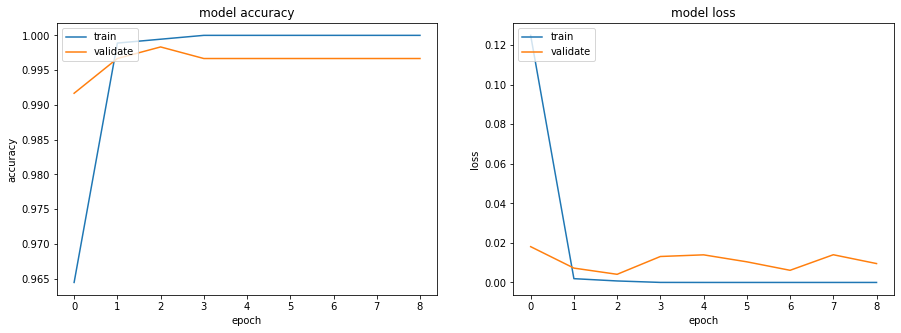

In [ ]:
plot_history(history)

In [ ]:
predictions = model.predict(x = validate_batches, steps = len(validate_batches), verbose = 0)
accuracy = accuracy_score(validate_batches.classes, np.argmax(predictions, axis=-1))
print('Validate Accuracy = %lf' % accuracy)

Validate Accuracy = 0.996667


In [ ]:
cm = confusion_matrix(y_true=validate_batches.classes, y_pred=np.argmax(predictions, axis=-1))
print(cm)

[[200   0   0]
 [  2 198   0]
 [  0   0 200]]


In [ ]:
predictions = model.predict(x = test_batches)
accuracy = accuracy_score(test_batches.classes, np.argmax(predictions, axis=-1))
print('Test Accuracy = %lf' % accuracy)

Test Accuracy = 0.993333


In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
print(cm)

[[199   1   0]
 [  2 197   1]
 [  0   0 200]]


**Random Forest**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [ ]:

rf_model = RandomForestClassifier(random_state = 2020)

rf_model.fit(X_train,y_train)

confusion_matrix(rf_model.predict(X_test),y_test)
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state=2020)
# Random search of parameters, using 3 fold cross validation, 
# search across 20 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_validate,y_validate)

rf_random.best_params_

In [ ]:
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [56,76, 96],
    'max_features': ['auto','sqrt'],
    'min_samples_leaf': [2, 4,6],
    'min_samples_split': [6,8,10],
    'n_estimators': [70,73,76,79,82,85,88]
}
rf = RandomForestClassifier(random_state = 2020)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(X_validate,y_validate)
grid_search.best_params_

rf_improved = RandomForestClassifier(n_estimators = 25, max_depth = 21, max_features = "auto", min_samples_leaf = 2, min_samples_split = 2, bootstrap = True)
rf_improved.fit(X_train,y_train)

confusion_matrix(rf_improved.predict(X_test),y_test)

**Support Vector Machine**

In [ ]:
svm_model = SVC()
params_svc = {
    'kernel':['rbf','linear']
    }
svc_cv = GridSearchCV(svm_model, params_svc, cv=5)
svc_cv.fit(X_validate, y_validate)
def print_training(model):
    print('best parameters: {}\n'.format(model.best_params_))
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean,std,params in zip(means,stds,model.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3),round(std+2,3),params))
print_training(svc_cv)

model_svm = SVC(kernel='rbf')

model_svm.fit(X_train,y_train)
confusion_matrix(model_svm.predict(X_test),y_test)

**Histogram of Gradients (HOG)**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
image = facemaskedtest[0]
hog_vec, hog_vis = feature.hog(image, visualize=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
#ax[0].imshow(image, cmap='gray')
ax[0].imshow(image)
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features');

image1 = facetest[4]
hog_vec, hog_vis = feature.hog(image1, visualize=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
#ax[0].imshow(image, cmap='gray')
ax[0].imshow(image1)
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features');

image2 = faceshieldtest[38]
hog_vec, hog_vis = feature.hog(image2, visualize=True)
fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
#ax[0].imshow(image, cmap='gray')
ax[0].imshow(image2)
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features');

X_train_hog = np.array([feature.hog(im)
                    for im in chain(facetrain,
                                    facemaskedtrain,
                                    faceshieldtrain)])
y_train = [0]*len(face_data) + [1]*len(facemask_data) + [2]*len(faceshield_data)

X_validate_hog = np.array([feature.hog(im)
                    for im in chain(facevalidate,
                                    facemaskedvalidate,
                                    faceshieldvalidate)])
X_test_hog = np.array([feature.hog(im)
                    for im in chain(facetest,
                                    facemaskedtest,
                                    faceshieldtest)])

#our baseline model for SVM
cross_val_score(GaussianNB(), X_train_hog, y_train)

svm_model = SVC()
params_svc = {
    'kernel':['rbf','linear']
    }
svc_cv = GridSearchCV(svm_model, params_svc, cv=5)
svc_cv.fit(X_validate_hog, y_validate)
def print_training(model):
    print('best parameters: {}\n'.format(model.best_params_))
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean,std,params in zip(means,stds,model.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3),round(std+2,3),params))
print_training(svc_cv)
model_svm = SVC(kernel='linear')

model_svm.fit(X_train_hog,y_train)
confusion_matrix(model_svm.predict(X_test_hog),y_test)